## Load the Dataset

In [2]:
import pandas as pd
data=pd.read_excel("myexcel.xlsx")
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


# Preprocessing: Correct the Height Column

In [4]:
import pandas as pd
import numpy as np  # Import numpy for random number generation

# Replace 'Height' values with random numbers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=data.shape[0])

# Ensure other columns have consistent and non-null data
data.fillna({'Salary': 0, 'College': 'Unknown'}, inplace=True)
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,174,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,177,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,173,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,177,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,150,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,162,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,164,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,175,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,176,231,Kansas,947276.0


# Analysis Tasks 
## Distribution of Employees Across Teams

In [7]:
# 1. Calculate the count and percentage.
team_distribution = data['Team'].value_counts()
team_percentage = (team_distribution / data.shape[0]) * 100

# Combine into a single DataFrame
team_analysis = pd.DataFrame({'Count': team_distribution, 'Percentage': team_percentage})
print(team_analysis)

                        Count  Percentage
Team                                     
New Orleans Pelicans       19    4.148472
Memphis Grizzlies          18    3.930131
Utah Jazz                  16    3.493450
New York Knicks            16    3.493450
Milwaukee Bucks            16    3.493450
Brooklyn Nets              15    3.275109
Portland Trail Blazers     15    3.275109
Oklahoma City Thunder      15    3.275109
Denver Nuggets             15    3.275109
Washington Wizards         15    3.275109
Miami Heat                 15    3.275109
Charlotte Hornets          15    3.275109
Atlanta Hawks              15    3.275109
San Antonio Spurs          15    3.275109
Houston Rockets            15    3.275109
Boston Celtics             15    3.275109
Indiana Pacers             15    3.275109
Detroit Pistons            15    3.275109
Cleveland Cavaliers        15    3.275109
Chicago Bulls              15    3.275109
Sacramento Kings           15    3.275109
Phoenix Suns               15    3

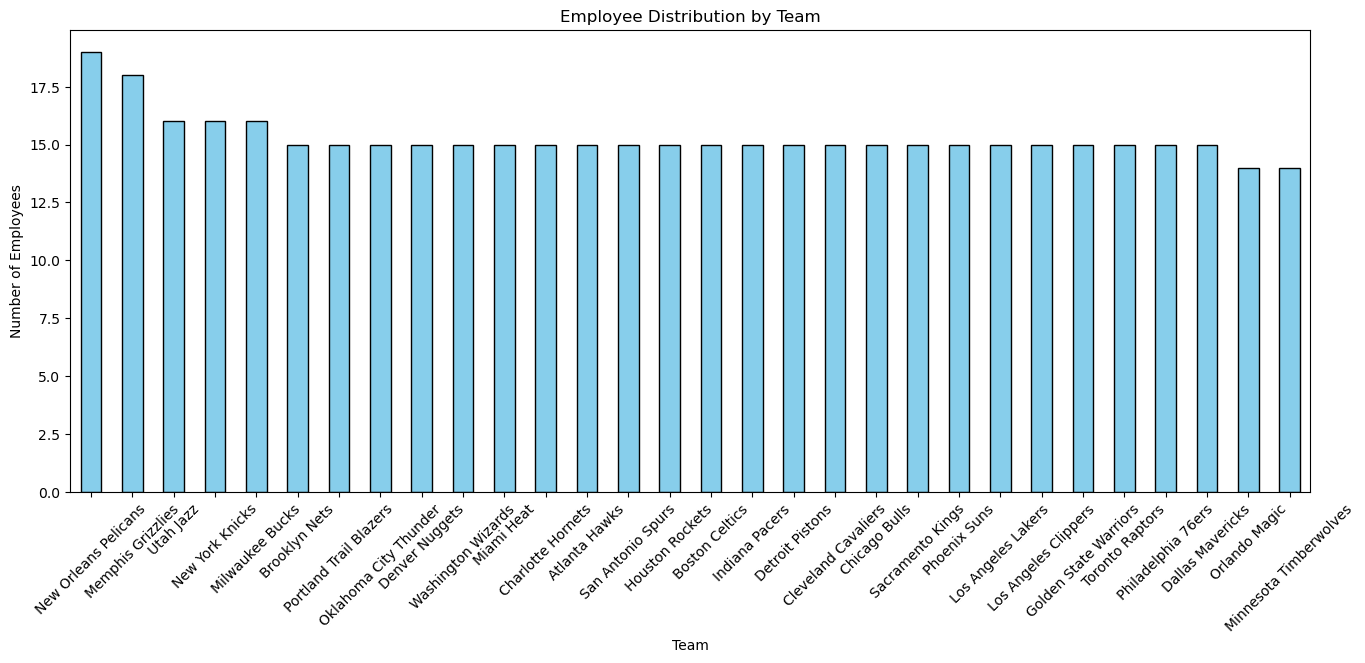

In [51]:
import matplotlib.pyplot as plt

# Team distribution
team_distribution = data['Team'].value_counts()

# Plotting
plt.figure(figsize=(16, 6))
team_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Employee Distribution by Team')
plt.xlabel('Team')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()


## Segregation by Position


In [13]:
# 2. Segregate employees based on their positions within the company
position_distribution = data['Position'].value_counts()
print(position_distribution)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


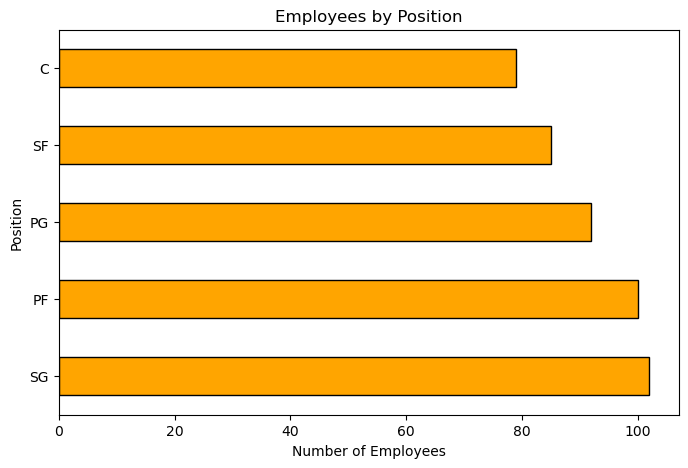

In [15]:
# Position distribution
position_distribution = data['Position'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
position_distribution.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Employees by Position')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.show()


#Predominant Age Group

In [17]:
#3. Identify the predominant age group among employees
bins = [0, 20, 25, 30, 35]
labels = ['0-20', '21-25', '26-30', '31-35']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

age_group_distribution = data['AgeGroup'].value_counts()
print(age_group_distribution)


AgeGroup
21-25    179
26-30    167
31-35     68
0-20      21
Name: count, dtype: int64


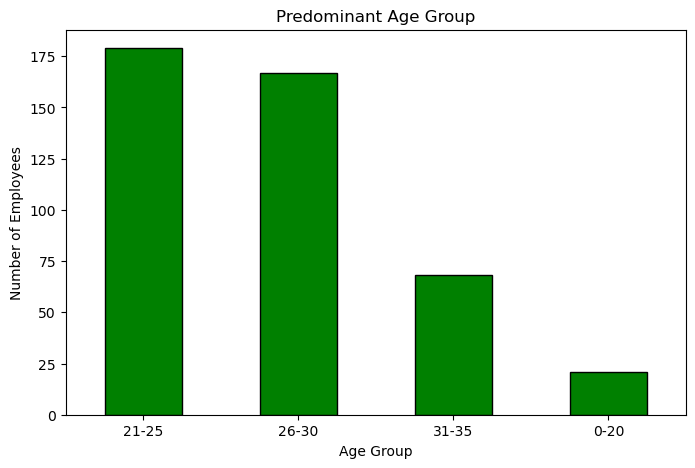

In [19]:
# Age groups
bins = [0, 20, 25, 30, 35]
labels = ['0-20', '21-25', '26-30', '31-35']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Age group distribution
age_group_distribution = data['AgeGroup'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
age_group_distribution.plot(kind='bar', color='green', edgecolor='black')
plt.title('Predominant Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.show()


#Team and Position with the Highest Salary Expenditure

In [21]:
#4. Discover which team and position have the highest salary expenditure
salary_by_team = data.groupby('Team')['Salary'].sum().sort_values(ascending=False)
salary_by_position = data.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("Highest Salary by Team:\n", salary_by_team.head(1))
print("Highest Salary by Position:\n", salary_by_position.head(1))


Highest Salary by Team:
 Team
Cleveland Cavaliers    106988689.0
Name: Salary, dtype: float64
Highest Salary by Position:
 Position
C    466377332.0
Name: Salary, dtype: float64


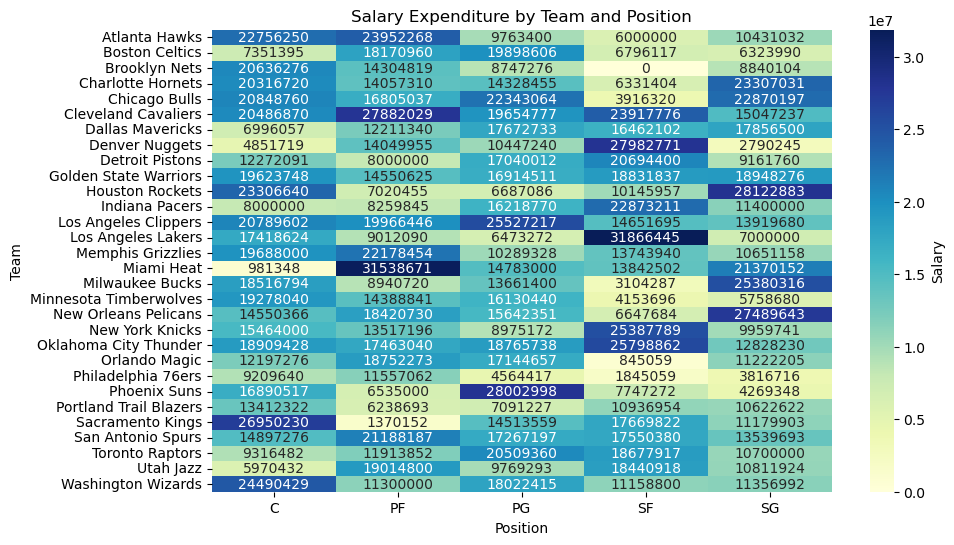

In [23]:
import seaborn as sns

# Salary by team and position
pivot_table = data.pivot_table(values='Salary', index='Team', columns='Position', aggfunc='sum', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Salary'})
plt.title('Salary Expenditure by Team and Position')
plt.ylabel('Team')
plt.xlabel('Position')
plt.show()


## Correlation Between Age and Salary

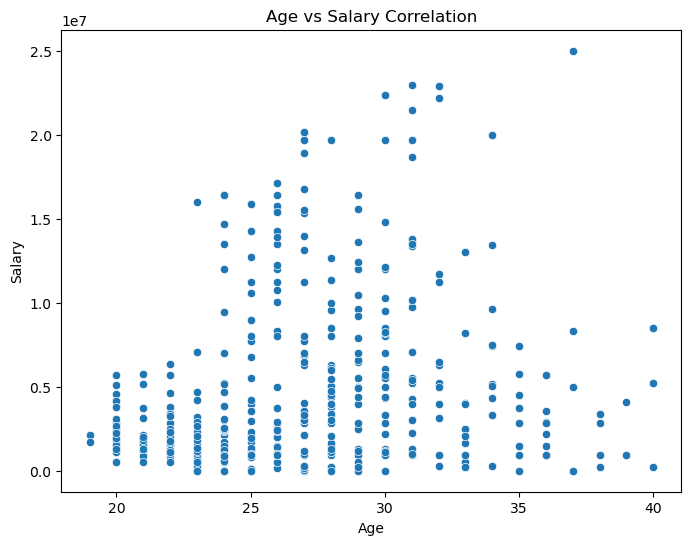

In [25]:
# 5. Investigate if there's any correlation between age and salary, and represent it visually
import matplotlib.pyplot as plt
import seaborn as sns

# Example visualization: Scatter plot for Age vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=data)
plt.title('Age vs Salary Correlation')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


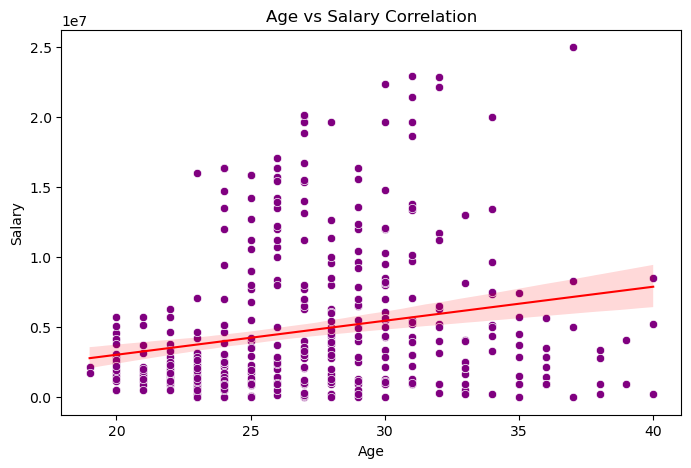

In [27]:
# Plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Salary', data=data, color='purple')
sns.regplot(x='Age', y='Salary', data=data, scatter=False, color='red', line_kws={"linewidth": 1.5})
plt.title('Age vs Salary Correlation')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()
